In [10]:
import photutils, astropy, math
from photutils import datasets
from astropy.modeling.functional_models import Sersic2D

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

from astropy import visualization, convolution, stats

import ashd

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord

import subprocess

#import skimage
#from skimage import morphology, filters

from scipy import ndimage

import sep

#from sklearn.gaussian_process import GaussianProcessRegressor, kernels

from scipy import interpolate, signal

import ipywidgets, scanner

#from bokeh.plotting import figure, output_file, show
#from bokeh.io import output_notebook
#output_notebook()

#import mpld3
#mpld3.enable_notebook()

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 16]

Loading BokehJS ...

In [4]:
butler = ashd.Butler("/run/media/me/DATA/asas-sn-images/")

norm = visualization.mpl_normalize.ImageNormalize(
    stretch=visualization.SqrtStretch())

def plotme(obj, rng=[10, 99]):
    vmin, vmax = np.percentile(obj, rng)
    plt.imshow(obj, cmap="Greys_r", norm=norm, vmin=vmin, vmax=vmax)

In [15]:
ra_box = ipywidgets.Text(placeholder="ra")
dec_box = ipywidgets.Text(placeholder="dec")
#btn = ipywidgets.Button(description="Find objects")

hbox = ipywidgets.HBox([ra_box, dec_box])
display(hbox)

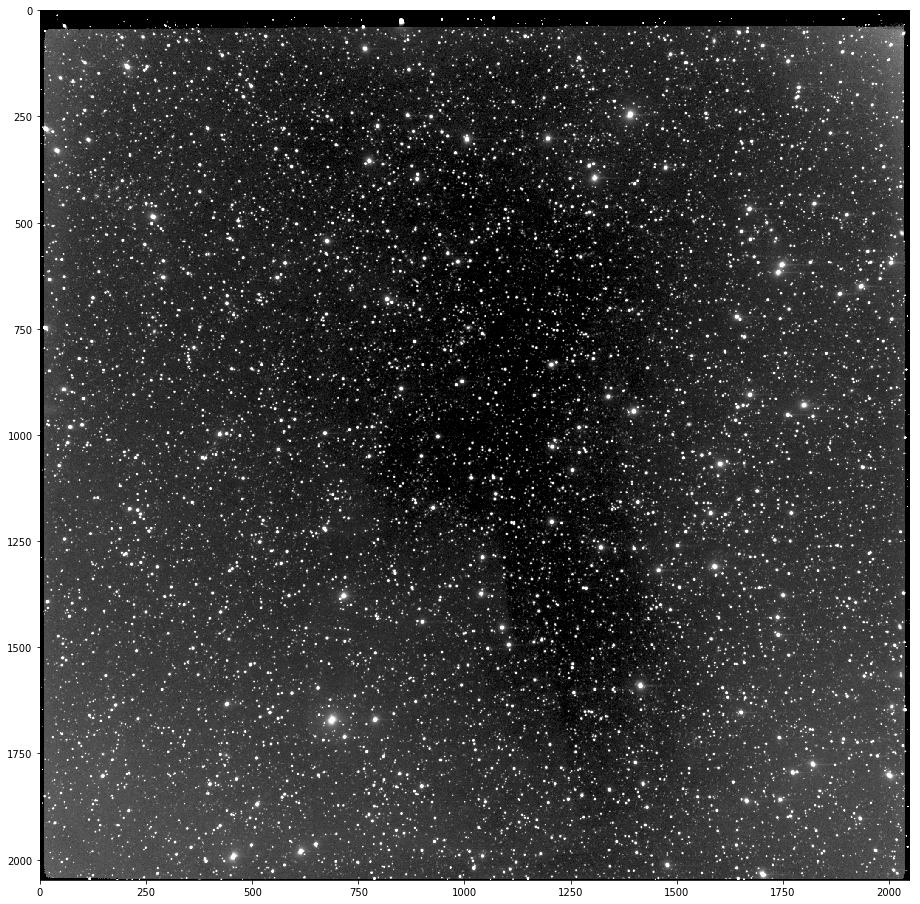

In [16]:
img = butler.get_image(ra=ra_box.value, dec=dec_box.value)
dsub = img.data.byteswap().newbyteorder()

objects, *_ = scanner.get_objs(dsub)

plotme(img.data)